In [ ]:
####################################
## 여기서 수행되는 matrix에서 하나의 열벡터(column)는
## 사진 하나 또는 eigenvector를 나타낸다.
####################################

In [1]:
# Common functions
import numpy as np
import cv2
import scipy
import scipy.io
import matplotlib.pyplot as plt
import torch
from torchvision import utils

# convert from image to double
def im2double(im):
  out=torch.div(im,255.0)
  return out
  
# convert matlab cell to vector
def cell2vec(inImage):
  nImage=len(inImage)
  sy, sx=inImage.size(2),inImage.size(3)
  image=torch.zeros(sx*sy,nImage)
  for i in range(nImage):
    temp=im2double(inImage[i])
    temp=torch.flatten(temp.T,start_dim=0)
    image[:,i]=temp[:]
  return image, nImage, sy, sx

# show a single image
def showSingleImage(U, name):
  singleImage=torch.unsqueeze(U,dim=0)
  singleImage=singleImage.expand(3,U.size(0))  
  plt.title(name)
  plt.imshow(torch.rot90(torch.reshape(singleImage,(3,32,32)),-1,[1,2]).permute(1,2,0))

# show the first k images
def showImage(U,name):
  flag = 0
  U_t=U[:]
  image_sample2=[]

  m=U.size(U.dim()-1)
  for i in range(100):
    if 32 >= m: 
      flag = 1
      image_sample2.append(U_t[i,:])
      
    else:
      j=U_t[:,i]
      j_min,_=torch.min(j,dim=0)
      j_max,_=torch.max(torch.sub(j,j_min),dim=0)
      j_s=torch.div(j,j_max)
      image_sample2.append( torch.flip(torch.rot90(torch.reshape(j_s,(1,32,32)),-1,[1,2]), (2,)))

  image_sample2=torch.stack(image_sample2)
  plt.figure(figsize=(6,8))
  plt.title(name)
  image_sample=utils.make_grid(image_sample2,nrow=10,normalize=True)
  plt.imshow(image_sample.permute(1,2,0))

In [2]:
# PCA function
def PCA(X):
  Cov = torch.cov(X) 
  print('PCA Cov.shape:',Cov.shape)
  print('PCA Cov[0,0]:',Cov[0,0])
  # covariance matrix -> diagonal은 row의 variance다른 것들은 covariance
  # 따라서 covariance matrix는 symmetry
  L, V = torch.eig(Cov, eigenvectors=True)
  #L, V = torch.linalg.eig(Cov)  
  return L, V

* 아래 CelebA_mini.mat 위치를 절대 경로로 지정해야함

/tmp/ipykernel_3066/586603384.py:17: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at  /opt/conda/conda-bld/pytorch_1659484810403/work/torch/csrc/utils/tensor_new.cpp:201.)
  train_image = torch.Tensor(list(train_image))
/tmp/ipykernel_3066/1709757772.py:22: UserWarning: The use of `x.T` on tensors of dimension other than 2 to reverse their shape is deprecated and it will throw an error in a future release. Consider `x.mT` to transpose batches of matricesor `x.permute(*torch.arange(x.ndim - 1, -1, -1))` to reverse the dimensions of a tensor. (Triggered internally at  /opt/conda/conda-bld/pytorch_1659484810403/work/aten/src/ATen/native/TensorShape.cpp:2981.)
  temp=torch.flatten(temp.T,start_dim=0)


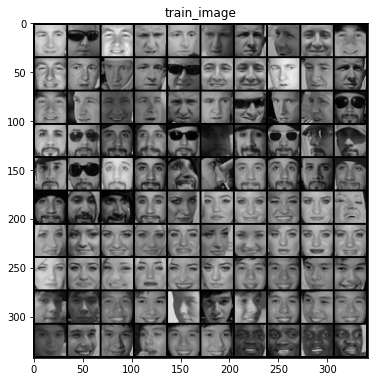

In [3]:
# main script for the PCA

#if __name__ == "__main__":

# prepare the data for PCA
# 아래 path는 본인 directory로 변경해야함!!!!!!!
mat = scipy.io.loadmat('./CelebA_mini.mat')
#train_label = mat['train_label'] # 
train_image = mat['train_image'] # 
#train_attr = mat['train_attr']
#test_label = mat['test_label']
test_image = mat['test_image']
#test_attr = mat['test_attr']
  
#train_label = np.int16(train_label)
#train_label = torch.from_numpy(train_label)
train_image = torch.Tensor(list(train_image))
train_image, _, _, _ = cell2vec(train_image)
#train_attr = torch.from_numpy(np.int16(train_attr))

test_image = torch.Tensor(list(test_image))
test_image, _, _, _ = cell2vec(test_image)
#test_attr = torch.from_numpy(np.int16(test_attr))

showImage(train_image, "train_image")

<class 'torch.Tensor'>
torch.Size([1024, 50008])
torch.Size([1024, 50008])
row    : 1024
column : 50008
torch.Size([1024])
tensor([0.5333, 0.5255, 0.5255, 0.5333, 0.5255])
torch.Size([32, 32])
tensor([0.5333, 0.5255, 0.5255, 0.5333, 0.5255])


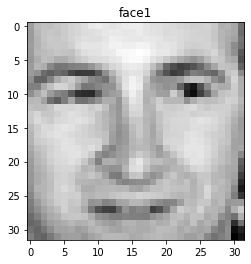

torch.Size([32, 32])


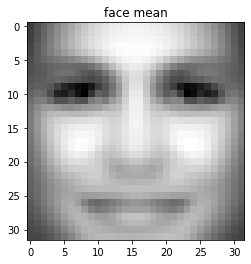

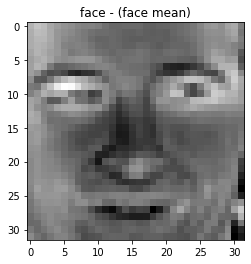

In [ ]:
#### my test!! ####

print(type(train_image))
print(train_image.shape)
print(train_image.size())
print('row    :',train_image.size(0))
print('column :',train_image.size(1))
# print(train_image.size(2)) ## error

temp = train_image[:,0]
print(temp.shape)
print(temp[0:5])
print(temp.reshape(32,32).shape)
print(temp.reshape(32,32)[0,0:5])

face1 = torch.transpose(temp.reshape(32,32),0,1)
plt.title('face1')
plt.imshow(face1, cmap='gray')
plt.show()

face_mean = torch.mean(train_image, dim=1)
face_mean = torch.transpose(face_mean.reshape(32,32),0,1)
print(face_mean.shape)
plt.title('face mean')
plt.imshow(face_mean, cmap='gray')
plt.show()

temp = face1 - face_mean
plt.title('face - (face mean)')
plt.imshow(temp, cmap='gray')
plt.show()

* PCA 학습 코드

shape : 1024 , 50008

mu shape : torch.Size([1024])

mu.repeat shape : torch.Size([50008, 1024])
mu.repeat.T shape : torch.Size([1024, 50008])

cov.shape: torch.Size([1024, 1024])
cov[0,0]: tensor(0.0544)
eigenvalues : torch.Size([1024, 2])
tensor(0.)
eigenvectors : torch.Size([1024, 1024])

PCA Cov.shape: torch.Size([1024, 1024])
PCA Cov[0,0]: tensor(0.0544)
eigenvalues : torch.Size([1024, 2])
eigenvectors : torch.Size([1024, 1024])



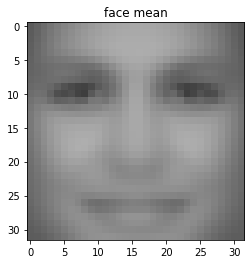

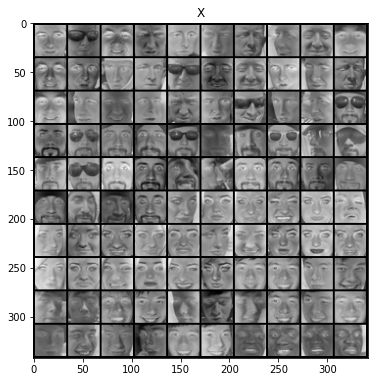

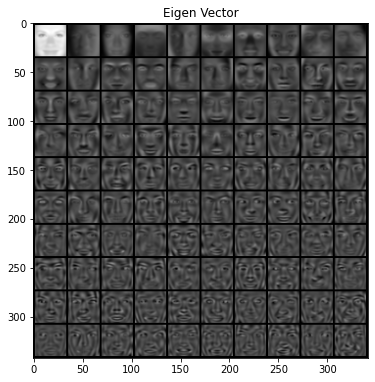

In [6]:
## 32,32 size의 image를 flatten한 1024 vector가 50008개 있다.
## 즉, 50008개의 image들과 1024의 dimension이 있다.

# train PCA script
n,m = train_image.size(0),train_image.size(1)
print('shape :', n,',', m)
print()

# train mean
# ** 모든 사진들의 각각의 pixel들에 대한 mean값 **
mu = torch.mean(train_image,dim=1)
print('mu shape :',mu.shape)
showSingleImage(mu, "face mean")
print()

# centerization using mean
X = train_image - mu.repeat(m,1).T # T는 transpose이다
 # reapeat()에서, param1은 mu의 row 반복횟수, param2는 mu의 column 반복횟수
print('mu.repeat shape :',mu.repeat(m,1).shape)
print('mu.repeat.T shape :',mu.repeat(m,1).T.shape)
print()

# 직접 training PCA
cov = (torch.mm(X, X.T))/X.size(1)
print('cov.shape:',cov.shape) # 1024 x 1024
print('cov[0,0]:',cov[0,0])
L, V = torch.eig(cov, eigenvectors=True)
print('eigenvalues :',L.shape)
print('eigenvectors :',V.shape)
print()

# function 이용 trainging PCA
Cov = torch.cov(X)
print('PCA Cov.shape:',Cov.shape)
print('PCA Cov[0,0]:',Cov[0,0])
L, V = torch.eig(Cov, eigenvectors=True)
print('eigenvalues :',L.shape)
print('eigenvectors :',V.shape)
print()

showImage(X, "X")  # 각 image들에 mean을 뺀 값들
showImage(V, "Eigen Vector")  # X의 covariance의 eigenvector

In [11]:
print(L.shape)
print(L)

torch.Size([1024, 2])
tensor([[1.1138e+01, 0.0000e+00],
        [5.7729e+00, 0.0000e+00],
        [3.2010e+00, 0.0000e+00],
        ...,
        [1.5833e-04, 0.0000e+00],
        [1.5710e-04, 0.0000e+00],
        [1.5659e-04, 0.0000e+00]])


tensor(11.1380)
tensor(1.9952e-05)
tensor(0)
tensor(685)

tensor(0.)
tensor(0.)

tensor(11.1380)
tensor(0.)


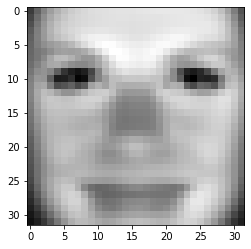

tensor(5.7729)
tensor(0.)


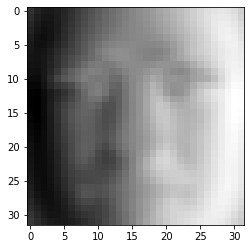

tensor(3.2010)
tensor(0.)


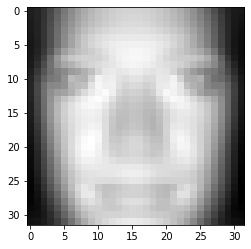

In [15]:
# eigen vector의 특징
import matplotlib.pyplot as plt

print(L[:,0].max())
print(L[:,0].min())
print(L[:,0].argmax())
print(L[:,0].argmin())
print()
print(L[:,1].max())
print(L[:,1].min())
print()

print(L[0,0])
print(L[0,1])
plt.imshow(V[:,0].reshape(32,32).T, cmap='gray')
plt.show()

print(L[1,0])
print(L[1,1])
plt.imshow(V[:,1].reshape(32,32).T, cmap='gray')
plt.show()

print(L[2,0])
print(L[2,1])
plt.imshow(V[:,2].reshape(32,32).T, cmap='gray')
plt.show()

In [ ]:
cov = torch.cov(X)


# X의 covariance matrix에서 [k,k]은 X[k,:]행의 obvervation에 대한 variance라는 것을 확인할 수 있다. 
print(torch.var(X[0,:], unbiased=False))
print(cov[0,0])
print()

print(torch.var(X[3,:], unbiased=False))
print(cov[3,3])
print()


# X의 covariance matrix가 symmetric인것을 확인할 수 있다.
print(cov[0,1])
print(cov[1,0])
print()

print(cov[1,4])
print(cov[4,1])
print()


print(torch.argmin(V))

tensor(0.0544)
tensor(0.0544)

tensor(0.0541)
tensor(0.0541)

tensor(0.0529)
tensor(0.0529)

tensor(0.0478)
tensor(0.0478)
tensor(182948)


tensor(0.2222)
torch.Size([1024, 1024])
tensor(0.0529) tensor(0.0529)
tensor(0.0503) tensor(0.0503)
tensor(0.0466) tensor(0.0466)


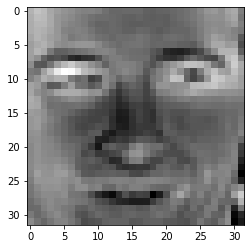

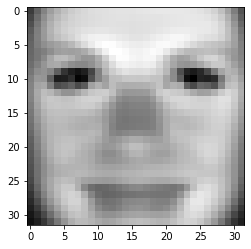

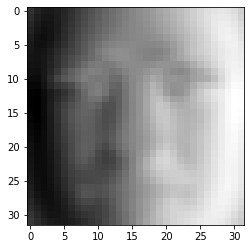

In [ ]:
cov_X = torch.cov(X)
print(cov_X.shape)
print(cov_X[0,1], cov_X[1,0])
print(cov_X[1,3], cov_X[3,1])
print(cov_X[25,30], cov_X[30,25])

face1 = torch.transpose(X[:,0].reshape(32,32),0,1)
plt.imshow(face1, cmap='gray')
plt.show()

first_eigvector = torch.transpose(V[:,0].reshape(32,32),0,1)
plt.imshow(first_eigvector, cmap='gray')
plt.show()

# 위 사진에서 second_eigvector가 어두운 이유는 first_eigvector의 값이 다른
# vector들 보다 상대적으로 높기 때문이다.
second_eigvector = torch.transpose(V[:,1].reshape(32,32),0,1)
plt.imshow(second_eigvector, cmap='gray')
plt.show()

torch.Size([1024, 50])
torch.Size([1024, 50008])
torch.Size([50, 50008])
torch.Size([1024, 50008])
[1] Average Pixel Difference (k=50) is 0.0611


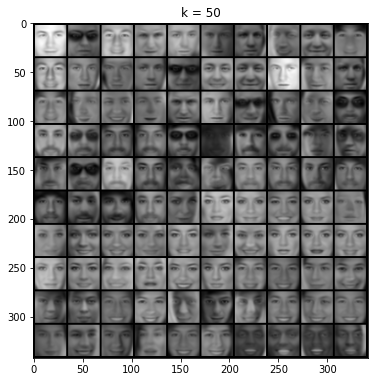

In [ ]:
# selecting the first 50 basis eigenvectors
k = 50 # max is 1024

#### linear projection using PCA <- reduce dimension
y = torch.mm(V[:,0:k].T, train_image - mu.repeat(m,1).T)
print(V[:,0:k].shape)
print((train_image - mu.repeat(m,1).T).shape)
print(y.shape) # (k X 50008)
 # torch.mm performs a matrix multiplication
 #  (V[:,0:k].T) X (train_image-mu.repeat(m,1).T)
 #   (50 X 1024) X (1024 X 50008)
 #   (50 X 50008) ---> 압축이된 상태!!

#### reconstructed image
rx = torch.mm(V[:, 0:k],y) + mu.repeat(m,1).T
#{(1024 X 50) X (50 X 50008)} + (1024 X 50008) = (1024 X 50008)
print(torch.mm(V[:,0:k],y).shape)
 # 압축에 쓰인 eigenvector들로 reconstructe하여 image표현
 # ((1024-50)*50008) - (1024*50) = 48,656,592 pixel 절약

showImage(rx, "k = 50");

# calculate the difference between the reconstructed images and the input images
diff = torch.pow( rx - train_image, 2)
diff = torch.sqrt( torch.mean(diff[:]) )
print(f'[1] Average Pixel Difference (k={k}) is {diff.numpy():0.4f}')

[1] Average Pixel Difference (k=1000) is 0.0022


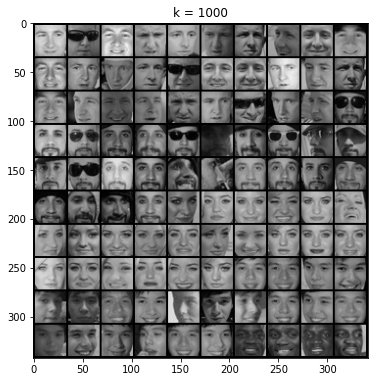

In [ ]:
# Selecting the first 1000 basis eigenvectors
k = 1000

# linear projection using PCA 
y = torch.mm(V[:,0:k].T, train_image-mu.repeat(m,1).T)

# reconstructed image
rx = torch.mm(V[:, 0:k],y) + mu.repeat(m,1).T

showImage(rx,"k = 1000");

#calculate the difference between the reconstructed images and the input images
diff = torch.pow(rx - train_image, 2)
diff = torch.sqrt(torch.mean(diff[:]))
print(f'[1] Average Pixel Difference (k={k}) is {diff.numpy():0.4f}')

##  test_image를 이용해서 k = 50일때 Average Pixel Difference를 구한다. 

[1] Average Pixel Difference (k=50) is 0.0616


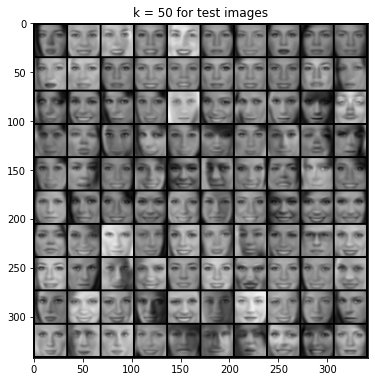

In [ ]:
# test images

# Selecting the first 50 basis eigenvectors
k = 50

n,m = test_image.size(0),test_image.size(1)

# linear projection using PCA 
#################################################
# 이곳에 코드 작성 : write your code here 
y = torch.mm(V[:,0:k].T, test_image-mu.repeat(m,1).T)

# reconstructed image
#################################################
# 이곳에 코드 작성 : write your code here 
rx = torch.mm(V[:,0:k],y) + mu.repeat(m,1).T

showImage(rx,"k = 50 for test images");

#calculate the difference between the reconstructed images and the input images
diff = torch.pow(rx - test_image, 2)
diff = torch.sqrt(torch.mean(diff[:]))
print(f'[1] Average Pixel Difference (k={k}) is {diff.numpy():0.4f}')

##  test_image를 이용해서 k=1000일때 Average Pixel Difference를 구한다. 

[1] Average Pixel Difference (k=1000) is 0.0023


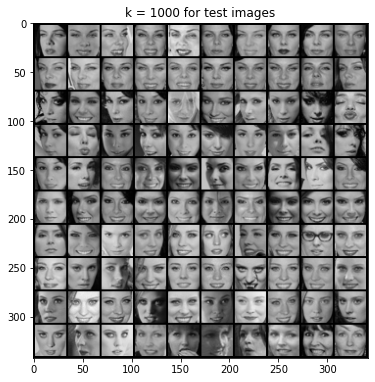

In [ ]:
# Selecting the first 1000 basis eigenvectors
k = 1000

# linear projection using PCA 
#################################################
# 이곳에 코드 작성 : write your code here 
y = torch.mm(V[:,0:k].T, test_image-mu.repeat(m,1).T)

# reconstructed image
#################################################
# 이곳에 코드 작성 : write your code here 
rx = torch.mm(V[:,0:k],y) + mu.repeat(m,1).T

showImage(rx,"k = 1000 for test images")

#calculate the difference between the reconstructed images and the input images
diff = torch.pow(rx - test_image, 2)
diff = torch.sqrt(torch.mean(diff[:]))
print(f'[1] Average Pixel Difference (k={k}) is {diff.numpy():0.4f}')

## 입력 영상이 random일때 k 값의 변화에 따라서 어떤 영상이 나타나는지 확인 할 것

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


torch.Size([1024, 1])
torch.Size([1024, 1])
torch.Size([500, 1])
torch.Size([1024, 1])


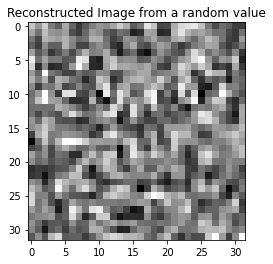

In [ ]:
x = torch.rand(1024,1)
print(x.shape) # (1024 X 1)
print(mu.reshape(1024,1).shape) # (1024)

#################################################
# 이곳에 코드 작성 : write your code here 
k = 500

# linear projection using PCA 
#################################################
# 이곳에 코드 작성 : write your code here 
y = torch.mm(V[:,0:k].T, x-mu.reshape(1024,1))
print(y.shape) # (k X 1)
print((x-mu.reshape(1024,1)).shape) # (1024, 1)
 # V[:, 0:k].T.shape = (k X 1024)

# reconstructed image
#################################################
# 이곳에 코드 작성 : write your code here 
rx = torch.mm(V[:,0:k],y) + mu.reshape(1024,1)

showSingleImage(torch.reshape(rx, (-1,)), "Reconstructed Image from a random value")

In [ ]:
x = torch.rand(1024,1)
print(x)
print(x.shape)
print(x.max())
print(x.min())

tensor([[0.0387],
        [0.0836],
        [0.2654],
        ...,
        [0.0911],
        [0.3427],
        [0.8676]])
torch.Size([1024, 1])
tensor(0.9997)
tensor(0.0011)


In [ ]:
a = torch.tensor([[1.,2.,1.],
                  [2.,3.,2.]])

print(a.shape)
print(torch.mean(a, dim=0))
print(torch.mean(a, dim=1))


torch.Size([2, 3])
tensor([1.5000, 2.5000, 1.5000])
tensor([1.3333, 2.3333])
